In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
from __future__ import print_function
from keras.optimizers import SGD,RMSprop,Adam
import matplotlib.pyplot as plt

In [0]:
class LeNet:
  @staticmethod
  def build(input_shape,classes):
    model =  Sequential()

    #step1
    model.add(Convolution2D(20,kernel_size=5,padding="same",input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),dim_ordering="th"))
    #step2
    model.add(Convolution2D(50,kernel_size=5,border_mode="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),dim_ordering="th"))
    #step 3
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    #step4
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    return model


In [0]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],1,28,28)
x_test = x_test.reshape(x_test.shape[0],1,28,28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0


In [0]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


In [42]:
model = LeNet.build(input_shape=(1,28,28),classes=10)
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 28, 20)         14020     
_________________________________________________________________
activation_5 (Activation)    (None, 1, 28, 20)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 14, 10)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 14, 50)         12550     
_________________________________________________________________
activation_6 (Activation)    (None, 1, 14, 50)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 7, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175)               0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  del sys.path[0]


In [46]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
fit = model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s 375us/step - loss: 0.1288 - acc: 0.9608 - val_loss: 0.1210 - val_acc: 0.9630
Epoch 2/20
48000/48000 [==============================] - 18s 366us/step - loss: 0.0922 - acc: 0.9710 - val_loss: 0.0963 - val_acc: 0.9705
Epoch 3/20
48000/48000 [==============================] - 18s 365us/step - loss: 0.0743 - acc: 0.9761 - val_loss: 0.0834 - val_acc: 0.9748
Epoch 4/20
48000/48000 [==============================] - 18s 367us/step - loss: 0.0599 - acc: 0.9803 - val_loss: 0.0694 - val_acc: 0.9788
Epoch 5/20
48000/48000 [==============================] - 18s 367us/step - loss: 0.0527 - acc: 0.9829 - val_loss: 0.0689 - val_acc: 0.9786
Epoch 6/20
48000/48000 [==============================] - 17s 355us/step - loss: 0.0477 - acc: 0.9844 - val_loss: 0.0630 - val_acc: 0.9808
Epoch 7/20
48000/48000 [==============================] - 18s 370us/step - loss: 0.0413 - acc: 0.9859 - val_loss: 0.

10000/10000 [==============================] - 2s 186us/step
Test Score:  0.05762658693955127 
Test Accuracy  0.9857
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


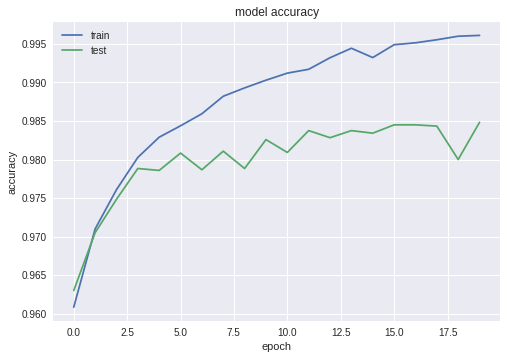

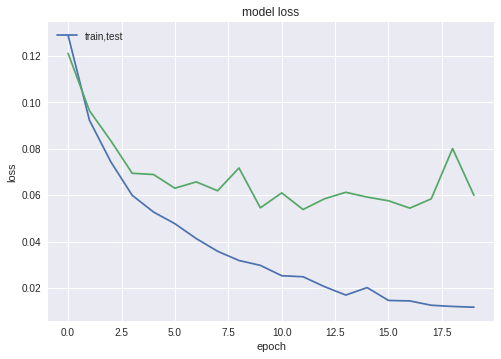

In [50]:
score = model.evaluate(x_test,y_test,verbose=VERBOSE)
print("Test Score: ",score[0],"\nTest Accuracy ",score[1])
print (fit.history.keys())
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train,test'],loc='upper left')
plt.show()
